#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#@loading the dataframe
data = pd.read_csv('social_network_ads.csv')
#only taking the requried features
data = data.iloc[:, 2:]
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.shape

(400, 3)

For doing any feature scaling, first we will do train test split either for standardization or normalization

In [4]:
#@train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis = 1),
                                                   data['Purchased'],
                                                   test_size = 0.3,
                                                   random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scalar to the train set, it will learn the parameter
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [7]:
# In standard scaler, we give dataframe but it stores that data in numpy array. So, converting it into the dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [8]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [9]:
 np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


From the above two dataframe, we found that after scaling our data mean value will become 0 & the standard deviation became 1

Now, we will see the **Effect of Scaling** in our dataframe in graphical represenation

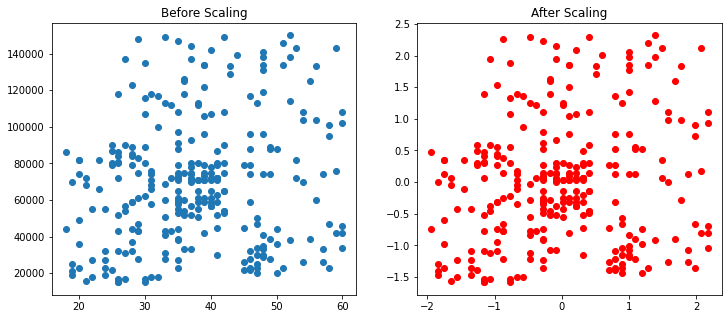

In [10]:
 fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# for before scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

# for after scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

Here, none of the data gets changed, but the data gets centered after feature scaling

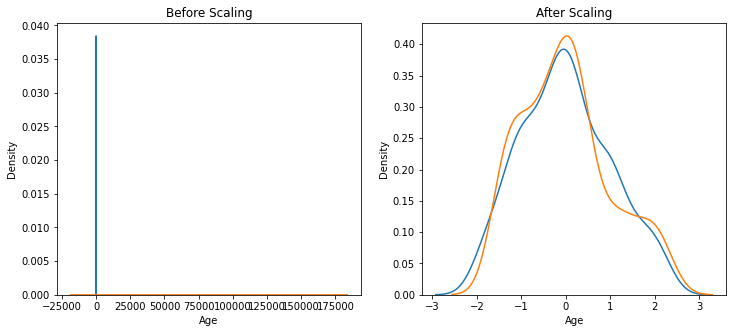

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

Here, before scaling both features are incomparable but after the feature scaling (standardization) both the distribution are comparable, which means that we can easily do any operations since both are in similar scale. Hence, we can get better performance in any algorithms


## Now, Comparision of Distributions

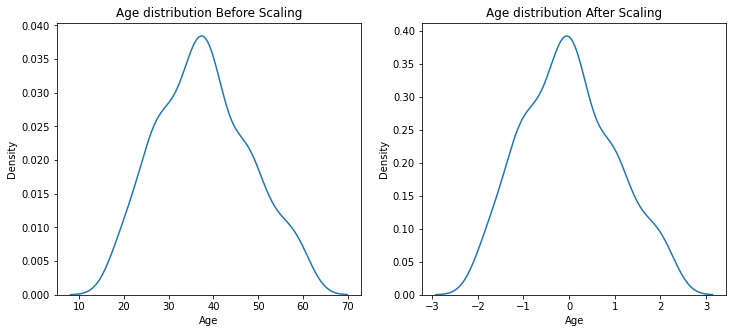

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Age distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

# after scaling
ax2.set_title('Age distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

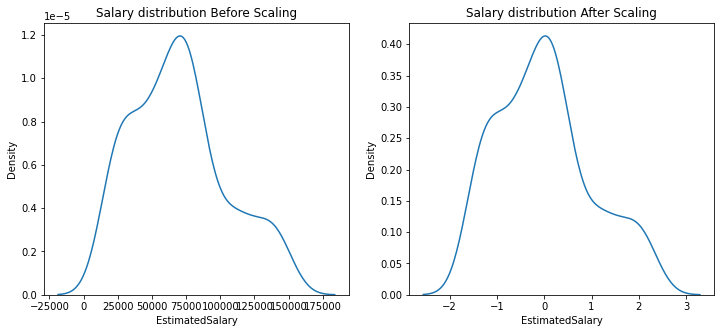

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Salary distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title('Salary distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

Here, for both graphs the distribution or shape of the data is same before and after scaling, but scale is different after standardization. And **Mean become 0 and Standard Deviation become 1**

## Why scaling is important?

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [16]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


After this experiment, we get higher accuracy after the scaling. Hence, we can say that scaling is important

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [21]:
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt.predict(X_test_scaled)

In [22]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.6583333333333333


For the algorithms like decision tree, scaling is not much that necessary

In [23]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outliers

In [24]:
data = data.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000,250000,350000], 'Purchased':[0,1,1]}), ignore_index=True)
data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24380\2694430120.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000,250000,350000], 'Purchased':[0,1,1]}), ignore_index=True)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


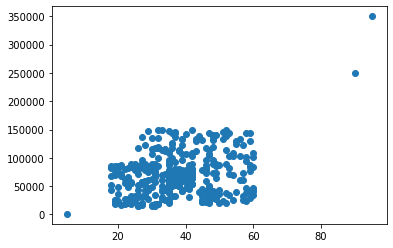

In [25]:
plt.scatter(data['Age'], data['EstimatedSalary'])

In [26]:
#@train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis = 1),
                                                   data['Purchased'],
                                                   test_size = 0.3,
                                                   random_state = 0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scalar to the train set, it will learn the parameter
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# In standard scaler, we give dataframe but it stores that data in numpy array. So, converting it into the dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

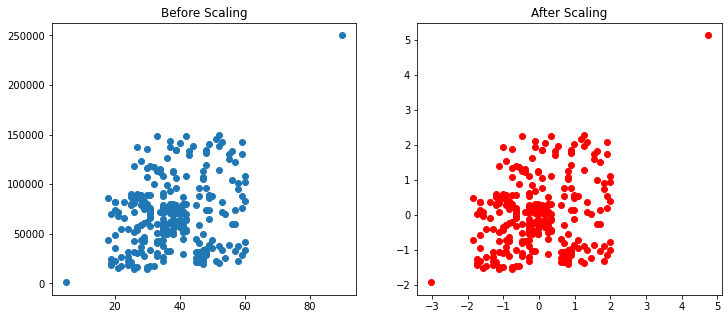

In [29]:
 fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# for before scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

# for after scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

Implementing standardization, outliers does not effect it. So, we need to handle the outliers ourselves explicitly